In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Reload dataset (with no header to prevent misinterpretation)
file_path = "/content/drive/My Drive/blog-gender-dataset.xlsx"
df = pd.read_excel(file_path, header=None)  # Read without using the first row as header

# Rename the first two columns
df = df.iloc[:, :2]  # Keep only the first two columns
df.columns = ["Text", "Gender"]  # Assign correct column names

# Drop rows with missing values
df = df.dropna()

# Display cleaned dataset info and first few rows
print("Cleaned Dataset Info:")
print(df.info())

print("\nFirst 5 Rows of Cleaned Dataset:")
df.head()

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3226 entries, 0 to 3231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    3226 non-null   object
 1   Gender  3226 non-null   object
dtypes: object(2)
memory usage: 75.6+ KB
None

First 5 Rows of Cleaned Dataset:


,Text,Gender
0,Long time no see. Like always I was rewriting...,M
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M
2,Who moved my Cheese??? The world has been de...,M
3,Yesterday I attended a biweekly meeting of an...,M
4,Liam is nothing like Natalie. Natalie never w...,F


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing Values in Dataset:")
print(missing_values)

# Print the total number of entries
print(f"Total number of entries in the dataset: {len(df)}")

Missing Values in Dataset:
Text      0
Gender    0
dtype: int64
Total number of entries in the dataset: 3226


In [4]:
print("Unique values in Gender column:")
print(df["Gender"].unique())

Unique values in Gender column:
['M' 'F' ' M' ' F' 'F ' ' M ' 'm' 'f']


In [5]:
# Standardize the Gender column (strip spaces & convert to uppercase)
df["Gender"] = df["Gender"].str.strip().str.upper()

# Check unique values again to confirm the fix
print("Cleaned Unique values in Gender column:")
print(df["Gender"].unique())

Cleaned Unique values in Gender column:
['M' 'F']


In [6]:
# Find duplicate rows based on 'Text' column
duplicates = df[df.duplicated(subset=['Text'])]

print(f"Number of duplicate entries: {len(duplicates)}")
print("Sample duplicate entries:")
duplicates.head()

Number of duplicate entries: 11
Sample duplicate entries:


,Text,Gender
1445,Suppose you want to buy a cart horse. Of cour...,F
1446,Two LA Landmarks: Pacific Dining Car and Lang...,F
1556,Man...this car rocks! Push button start...auto...,M
1743,I've found out that my best friend plans to co...,F
1780,Real school starts on Wednesday. I am excited ...,F


In [7]:
# Remove duplicate rows
df = df.drop_duplicates(subset=['Text'], keep='first')

print(f"Number of entries after removing duplicates: {len(df)}")

Number of entries after removing duplicates: 3215


In [8]:
print("Gender distribution:")
print(df["Gender"].value_counts())

Gender distribution:
Gender
M    1673
F    1542
Name: count, dtype: int64


<ipython-input-9-314d955af40c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Gender"], palette="viridis")


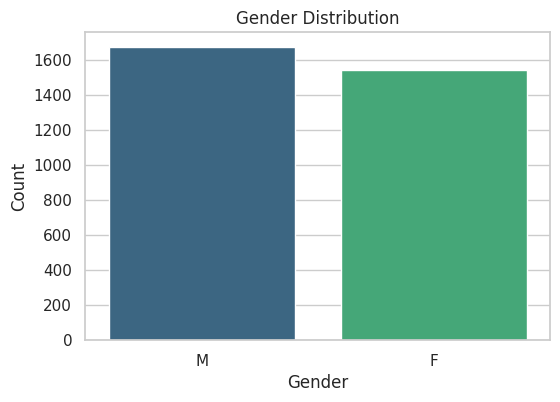

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set Seaborn style
sns.set(style="whitegrid")

# 1️⃣ Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Gender"], palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#Exploratory Data Analysis (EDA)

<ipython-input-10-e2b9dd29ba19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="viridis")


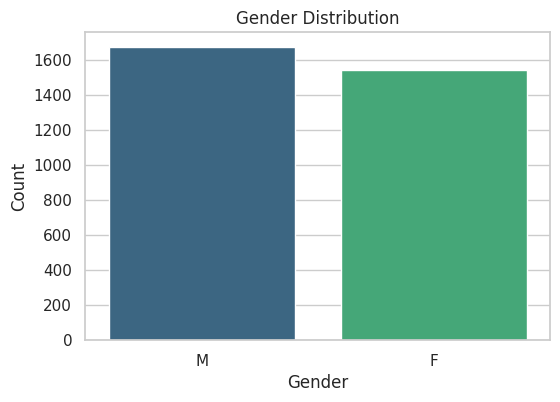

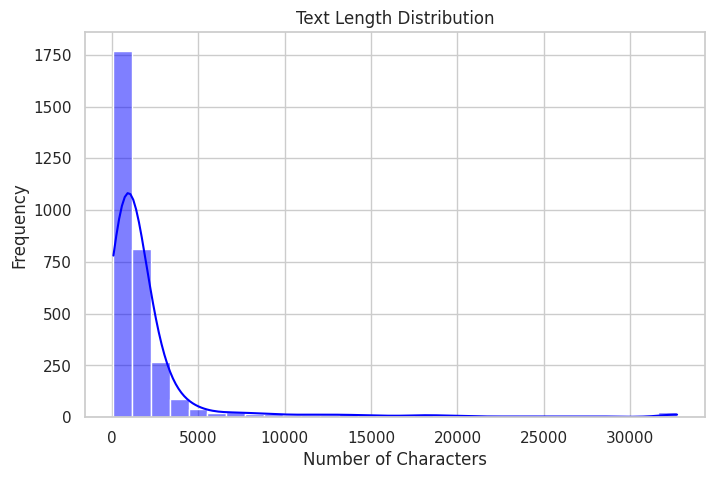

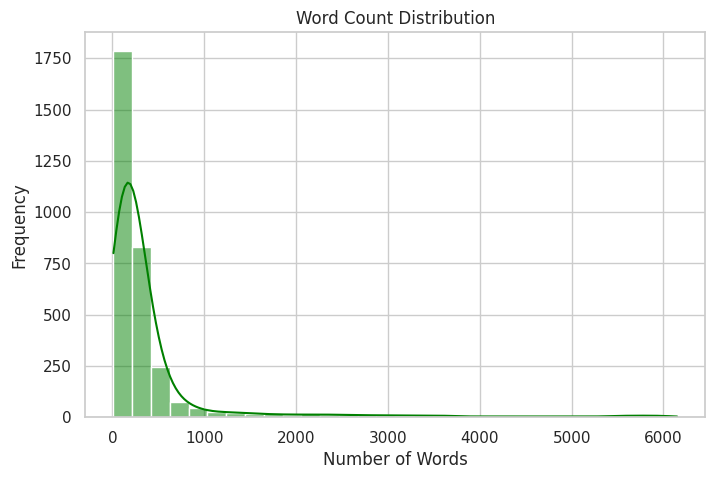

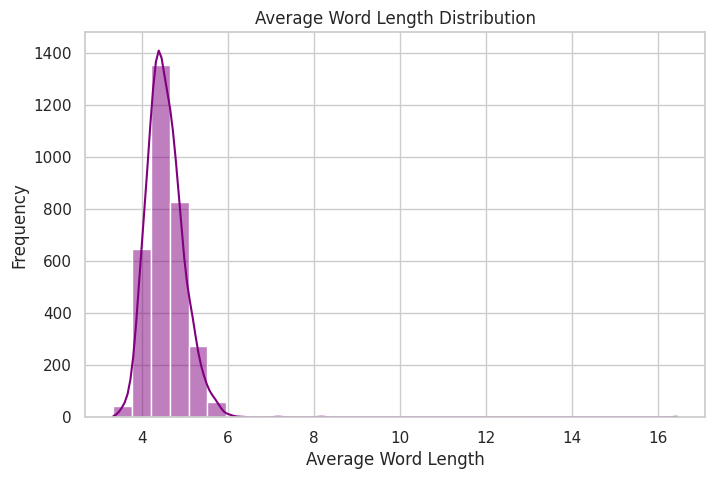

Dataset with Text Length, Word Count, and Average Word Length:
                                                Text Gender  Text_Length  \
0   Long time no see. Like always I was rewriting...      M          954   
1   Guest Demo: Eric Iverson’s Itty Bitty Search\...      M         1877   
2  Who moved my Cheese???   The world has been de...      M         5983   
3   Yesterday I attended a biweekly meeting of an...      M         1132   
4   Liam is nothing like Natalie. Natalie never w...      F         1139   

   Word_Count  Avg_Word_Length  
0         164         4.798780  
1         312         4.993590  
2        1106         4.392405  
3         192         4.885417  
4         222         4.112613  


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Gender Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender", palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 2. Text Length Distribution
df['Text_Length'] = df['Text'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(df['Text_Length'], bins=30, kde=True, color='blue')
plt.title("Text Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# 3. Word Count Distribution
df['Word_Count'] = df['Text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['Word_Count'], bins=30, kde=True, color='green')
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# 4. Average Word Length Distribution
df['Avg_Word_Length'] = df['Text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_Word_Length'], bins=30, kde=True, color='purple')
plt.title("Average Word Length Distribution")
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.show()

# Display the first few rows with the new features
print("Dataset with Text Length, Word Count, and Average Word Length:")
print(df[['Text', 'Gender', 'Text_Length', 'Word_Count', 'Avg_Word_Length']].head())

In [11]:
df.head()

,Text,Gender,Text_Length,Word_Count,Avg_Word_Length
0,Long time no see. Like always I was rewriting...,M,954,164,4.798780
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,1877,312,4.993590
2,Who moved my Cheese??? The world has been de...,M,5983,1106,4.392405
3,Yesterday I attended a biweekly meeting of an...,M,1132,192,4.885417
4,Liam is nothing like Natalie. Natalie never w...,F,1139,222,4.112613


In [12]:
import re
# Enhanced text cleaning function
def clean_text_v2(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters except periods (.), commas (,), and spaces
    text = re.sub(r'[^a-zA-Z.,\s]', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the enhanced cleaning function
df['Cleaned_Text'] = df['Text'].apply(clean_text_v2)

# Display a few cleaned text samples
print("Sample cleaned text after enhancement:")
print(df['Cleaned_Text'].head())

Sample cleaned text after enhancement:
0    long time no see. like always i was rewriting ...
1    guest demo eric iversons itty bitty search feb...
2    who moved my cheese the world has been develop...
3    yesterday i attended a biweekly meeting of an ...
4    liam is nothing like natalie. natalie never we...
Name: Cleaned_Text, dtype: object


In [13]:
df.head()

,Text,Gender,Text_Length,Word_Count,Avg_Word_Length,Cleaned_Text
0,Long time no see. Like always I was rewriting...,M,954,164,4.798780,long time no see. like always i was rewriting ...
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,1877,312,4.993590,guest demo eric iversons itty bitty search feb...
2,Who moved my Cheese??? The world has been de...,M,5983,1106,4.392405,who moved my cheese the world has been develop...
3,Yesterday I attended a biweekly meeting of an...,M,1132,192,4.885417,yesterday i attended a biweekly meeting of an ...
4,Liam is nothing like Natalie. Natalie never w...,F,1139,222,4.112613,liam is nothing like natalie. natalie never we...


#TF-IDF and CountVectorizer Transformation:

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Convert Gender labels to binary format (1 for Male, 0 for Female)
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

y = df['Gender']

# Step 1: TF-IDF Transformation for LR and SVM
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['Cleaned_Text']).toarray()

# Step 2: CountVectorizer Transformation for XGBoost
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))
X_count = count_vectorizer.fit_transform(df['Cleaned_Text']).toarray()

# Train-Test Split for both vectorizations
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y, test_size=0.2, random_state=42)

print("Data transformation completed: TF-IDF for LR and SVM, CountVectorizer for XGBoost")

Data transformation completed: TF-IDF for LR and SVM, CountVectorizer for XGBoost


#Traditional machine learning models.

In [15]:
# Step 3: Model Training and Evaluation
models = {
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Function to train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test, model_name):
    model = models[model_name]
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print(f"\n{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, predictions))

# Train and evaluate LR (L1), LR (L2), and SVM with TF-IDF features
print("\nUsing TF-IDF Features:")
train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf, "Logistic Regression (L1)")
train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf, "Logistic Regression (L2)")
train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf, "SVM")

# Train and evaluate XGBoost with CountVectorizer features
print("\nUsing CountVectorizer Features:")
train_and_evaluate(X_train_count, X_test_count, y_train_count, y_test_count, "XGBoost")


Using TF-IDF Features:

Training Logistic Regression (L1)...

Logistic Regression (L1) - Accuracy: 0.6858, F1 Score: 0.7270
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       294
           1       0.69      0.77      0.73       349

    accuracy                           0.69       643
   macro avg       0.69      0.68      0.68       643
weighted avg       0.69      0.69      0.68       643


Training Logistic Regression (L2)...

Logistic Regression (L2) - Accuracy: 0.7294, F1 Score: 0.7597
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       294
           1       0.73      0.79      0.76       349

    accuracy                           0.73       643
   macro avg       0.73      0.72      0.73       643
weighted avg       0.73      0.73      0.73       643


Training SVM...

SVM - Accuracy: 0.7107, F1 Score: 0.7380
Classification 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:28:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy: 0.6781, F1 Score: 0.6987
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       294
           1       0.71      0.69      0.70       349

    accuracy                           0.68       643
   macro avg       0.68      0.68      0.68       643
weighted avg       0.68      0.68      0.68       643

